In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
plt.style.use('seaborn-dark-palette')

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)

print(f'The dimension of the data is - {df.shape}')

The dimension of the data is - (400, 3)


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [7]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
print("Size of X: {}".format(X.shape))
print("Size of Y: {}".format(Y.shape))

Size of X: (400, 2)
Size of Y: (400,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0,
                                                    shuffle=True)

In [11]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (300, 2)
Size of X_test: (100, 2)
Size of Y_train: (300,)
Size of Y_test: (100,)


In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [15]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[62,  6],
       [ 4, 28]], dtype=int64)

In [16]:
acc = accuracy_score(Y_test, y_pred)
print(f"The accuracy in percentage - {acc*100}%")

The accuracy in percentage - 90.0%


In [17]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



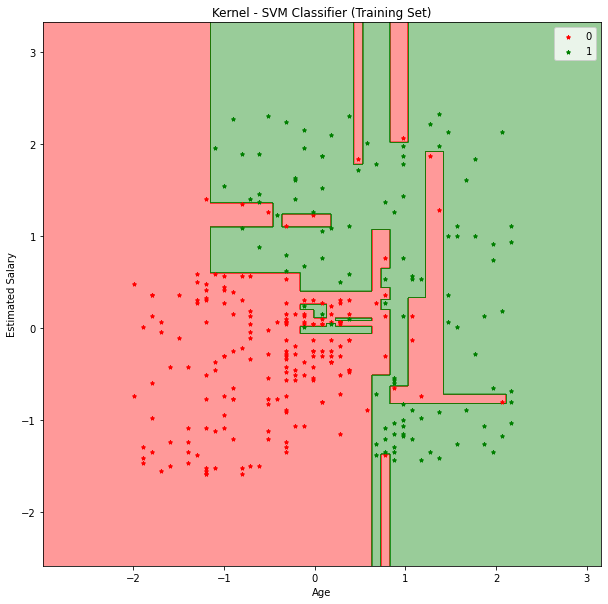

In [18]:
# Training Set
figure = plt.figure(figsize = (10,10))

x_set, y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                              step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1,
                              step = 0.01))

plt.contourf(X1,
             X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4,
             cmap = ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i),
                s = 15,
                marker = '*',
                label = j
               )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Kernel - SVM Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

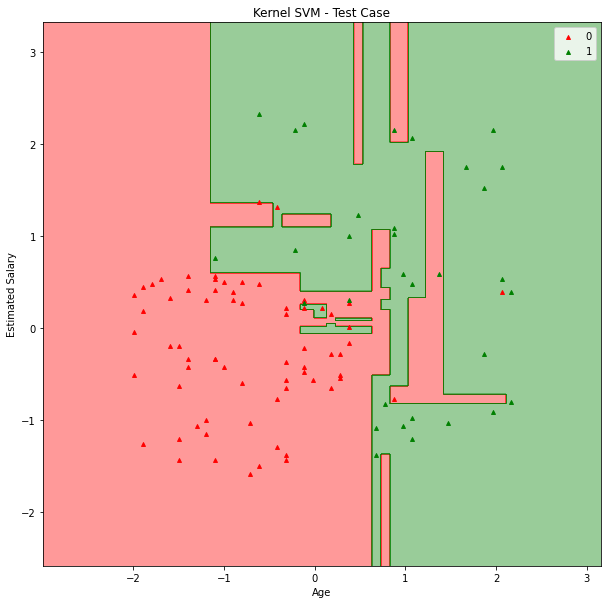

In [19]:
# Visuaizing the test case result
figure = plt.figure(figsize = (10,10))

x_set, y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, 
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1,
                               step = 0.01))

plt.contourf(X1,
             X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             cmap = ListedColormap(('red', 'green')),
             alpha = 0.4
            )

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1 ],
                color = ListedColormap(('red', 'green'))(i),
                s = 15,
                label = j,
                marker = '^'
               )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("Kernel SVM - Test Case")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()